# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [261]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [13]:
print(f"Number of columns and rows: {df_tesla.shape}")
df_tesla.head()


Number of columns and rows: (124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [9]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [10]:
print(df_tesla.describe())
# Monthly periodicity
# 100 is the largest value in the Search Column


       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007


### Unemployment Data

In [15]:
print(f"Number of columns and rows: {df_unemployment.shape}")
df_unemployment.head()

Number of columns and rows: (181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [14]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [16]:
print(f"Number of columns and rows: {df_btc_price.shape}")
df_btc_price.head()

Number of columns and rows: (2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [17]:
print(f"Number of columns and rows: {df_btc_search.shape}")
df_btc_search.head()

Number of columns and rows: (73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [20]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')
print(df_btc_search.describe())

largest BTC News Search: 100
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [26]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [55]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [65]:
print(f'Number of missing values: {df_btc_price.isna().sum().sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [67]:
df_btc_price.dropna(inplace=True)
df_btc_price.iloc[2149]

DATE         2020-08-06
CLOSE      11779.773438
VOLUME    23400740340.0
Name: 2150, dtype: object

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [158]:
df_tesla_month = pd.to_datetime(df_tesla["MONTH"])
df_btc_price_month = pd.to_datetime(df_btc_price["DATE"])
df_btc_search_month = pd.to_datetime(df_btc_search["MONTH"] )
df_unemployment_month = pd.to_datetime(df_unemployment["MONTH"])

In [159]:
print(df_tesla_month)
print(df_btc_price_month)

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]
0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [133]:
df_btc_price_monthly = df_btc_price.resample(rule="M", on="DATE").last()
df_btc_price_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


In [211]:
df_btc_price_avg_monthly = df_btc_price.resample(rule="M", on="DATE").mean()
df_btc_price_avg_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

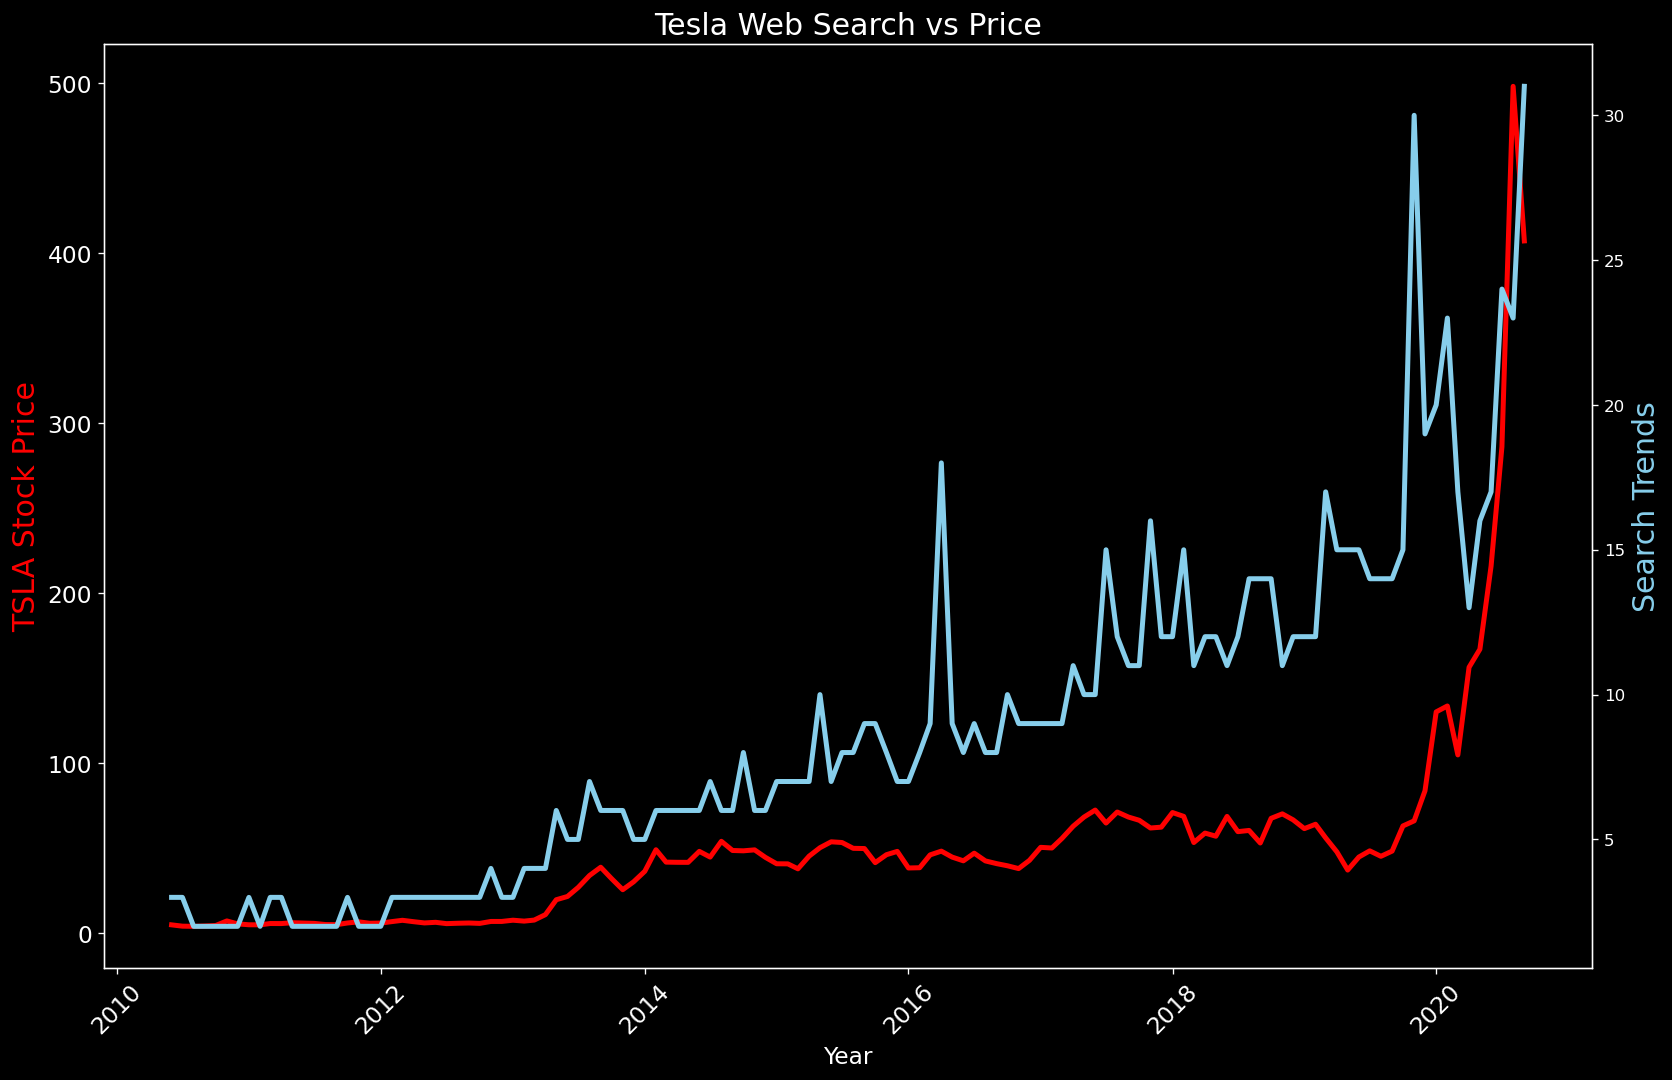

In [202]:
# Create locators for ticks on the time axis
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
plt.figure(figsize=(16,10), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("TSLA Stock Price", color="red", fontsize=18)
ax2.set_ylabel("Search Trends", color="skyblue", fontsize=18)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="red", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue", linewidth=3)

### Notebook Formatting & Style Helpers

In [201]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

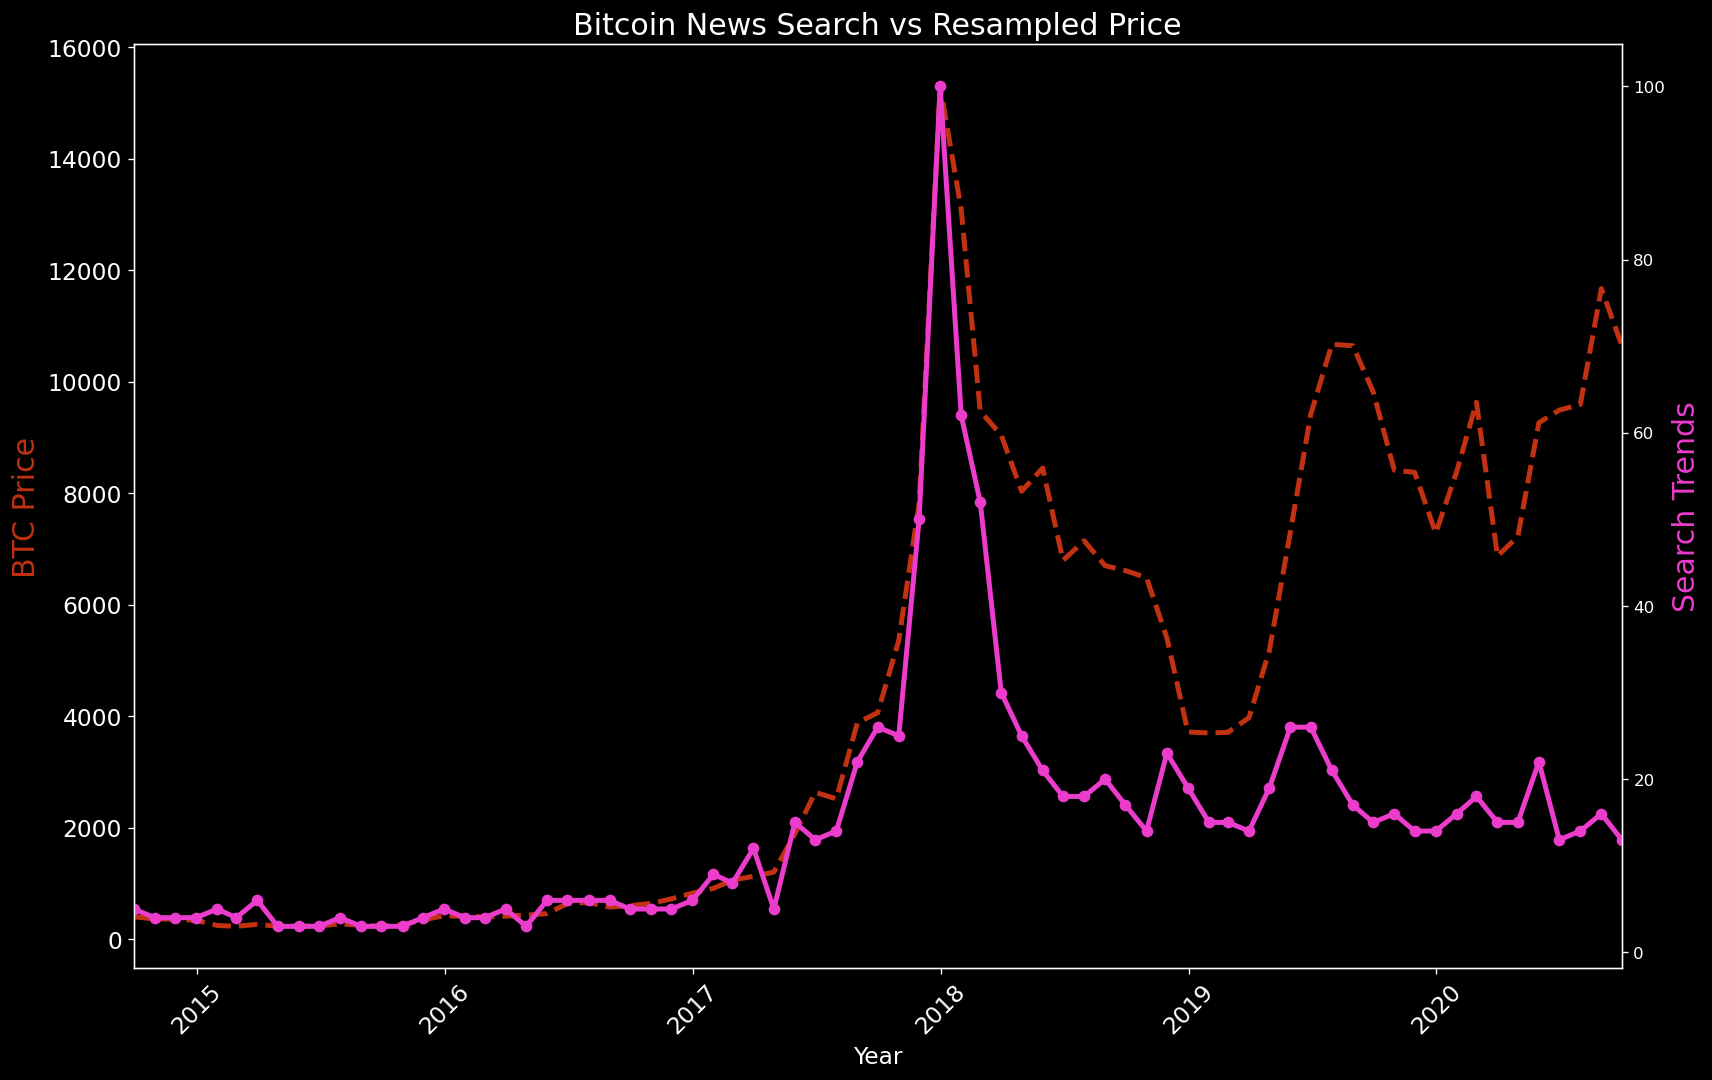

In [274]:
# Create locators for ticks on the time axis
plt.figure(figsize=(16,10), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_btc_price_avg_monthly.index.min(), df_btc_price_avg_monthly.index.max())

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("BTC Price", color="#c23111", fontsize=18)
ax2.set_ylabel("Search Trends", color="#eb3ccc", fontsize=18)

ax1.plot(df_btc_price_avg_monthly.index, df_btc_price_avg_monthly.CLOSE, color="#c23111", linewidth=3, linestyle="--")
ax2.plot(df_btc_price_avg_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color="#eb3ccc", linewidth=3, marker="o")

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

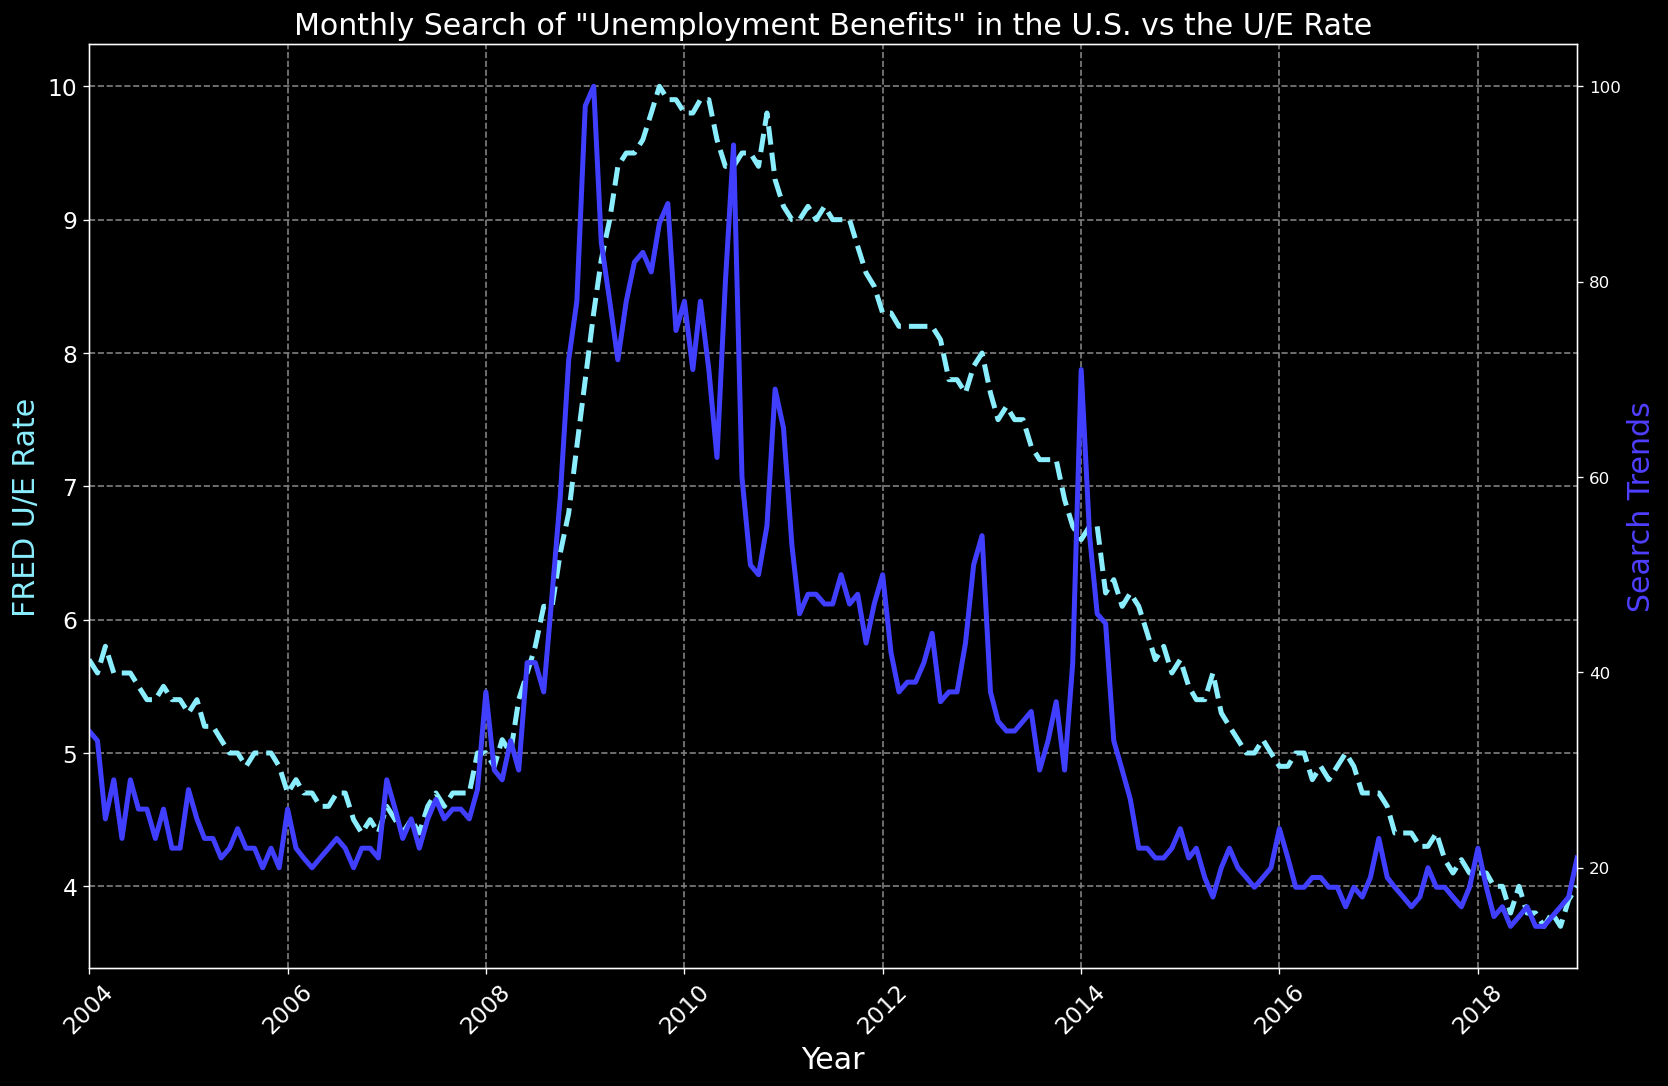

In [251]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
plt.figure(figsize=(16,10), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid(color="grey", linestyle="--", linewidth=1)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="#8beeff", fontsize=18)
ax2.set_ylabel("Search Trends", color="#4f3fff", fontsize=18)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="#8beeff", linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="#413fff", linewidth=3)

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE  MEAN_UE_BENEFITS_WEB_SEARCH_6M  \
0 2004-01-01                      34     5.7                             NaN   
1 2004-02-01                      33     5.6                             NaN   
2 2004-03-01                      25     5.8                             NaN   
3 2004-04-01                      29     5.6                             NaN   
4 2004-05-01                      23     5.6                             NaN   

   MEAN_UNRATE  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


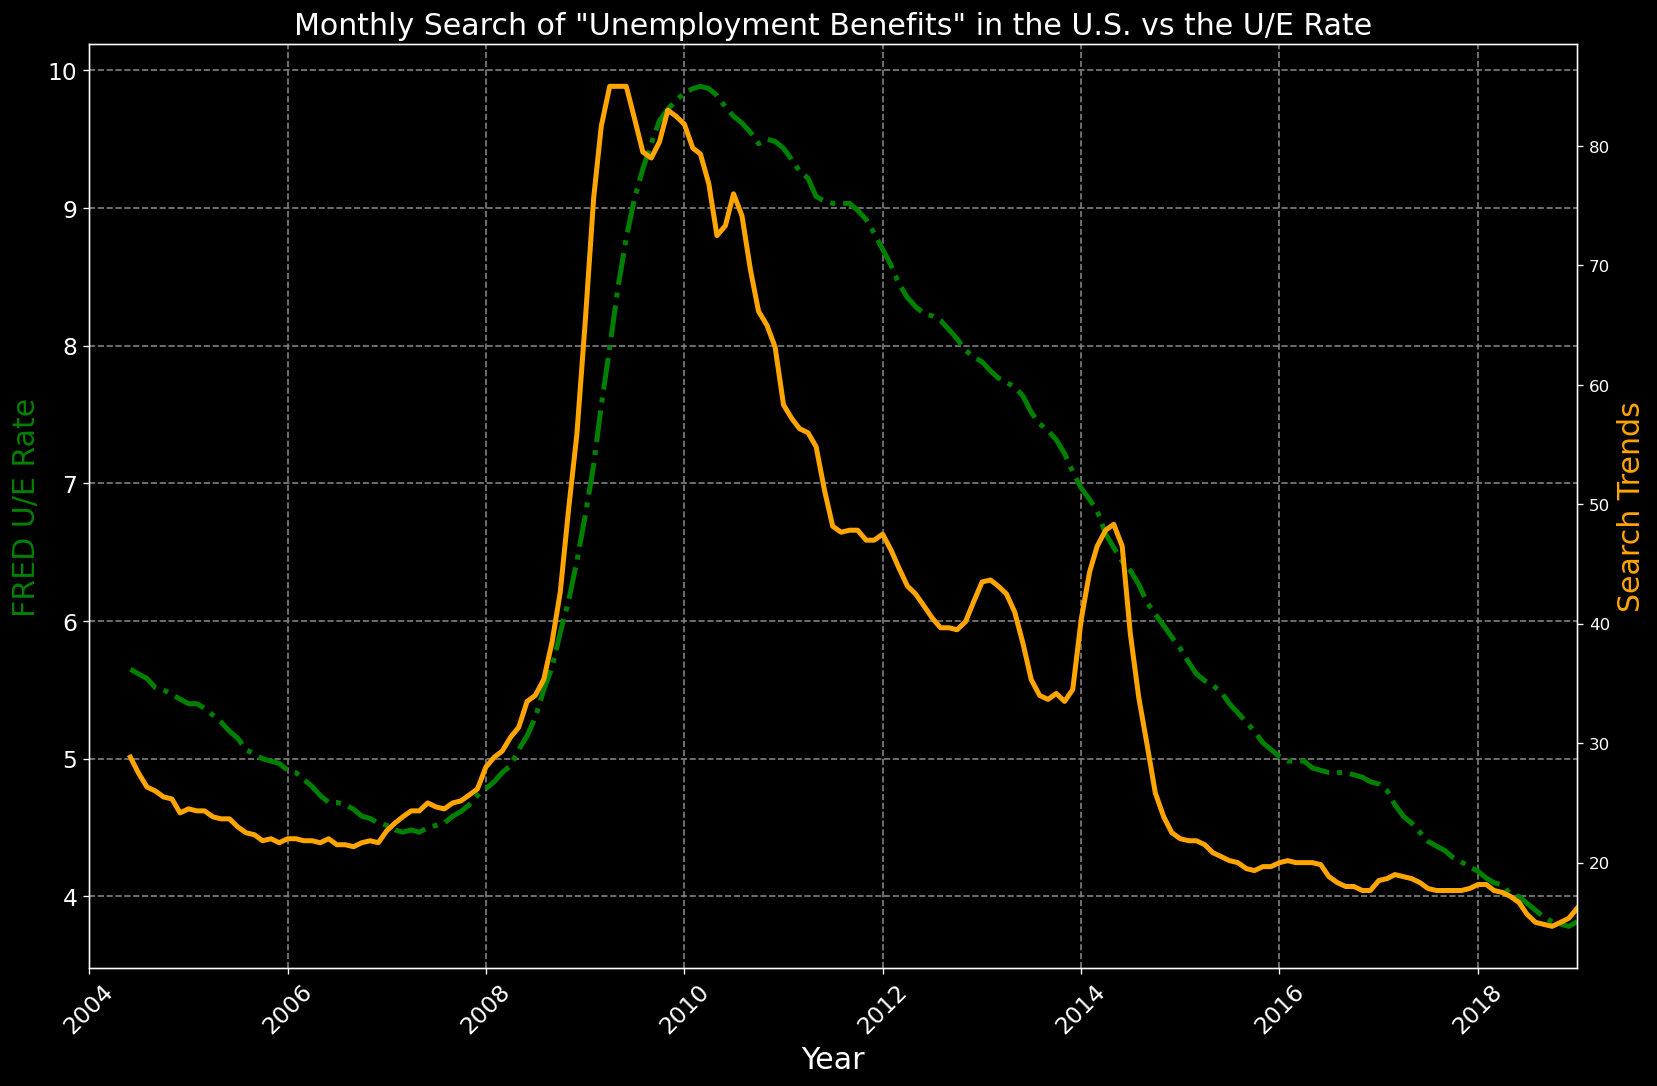

In [267]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
df_unemployment[["MEAN_UE_BENEFITS_WEB_SEARCH_6M", "MEAN_UNRATE"]] = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(6).mean()
print(df_unemployment.head())

plt.figure(figsize=(16,10), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid(color="grey", linestyle="--", linewidth=1)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="green", fontsize=18)
ax2.set_ylabel("Search Trends", color="orange", fontsize=18)

ax1.plot(df_unemployment.MONTH, df_unemployment.MEAN_UNRATE, color="green", linewidth=3, linestyle="-.")
ax2.plot(df_unemployment.MONTH, df_unemployment.MEAN_UE_BENEFITS_WEB_SEARCH_6M, color="orange", linewidth=3)
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [268]:
df_unemployment_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
print(df_unemployment_2020.head())

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                       9     5.7
1  2004-02                       8     5.6
2  2004-03                       7     5.8
3  2004-04                       8     5.6
4  2004-05                       6     5.6


In [269]:
df_unemployment_2020["MONTH"] = pd.to_datetime(df_unemployment_2020["MONTH"])
print(df_unemployment_2020["MONTH"])

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
195   2020-04-01
196   2020-05-01
197   2020-06-01
198   2020-07-01
199   2020-08-01
Name: MONTH, Length: 200, dtype: datetime64[ns]


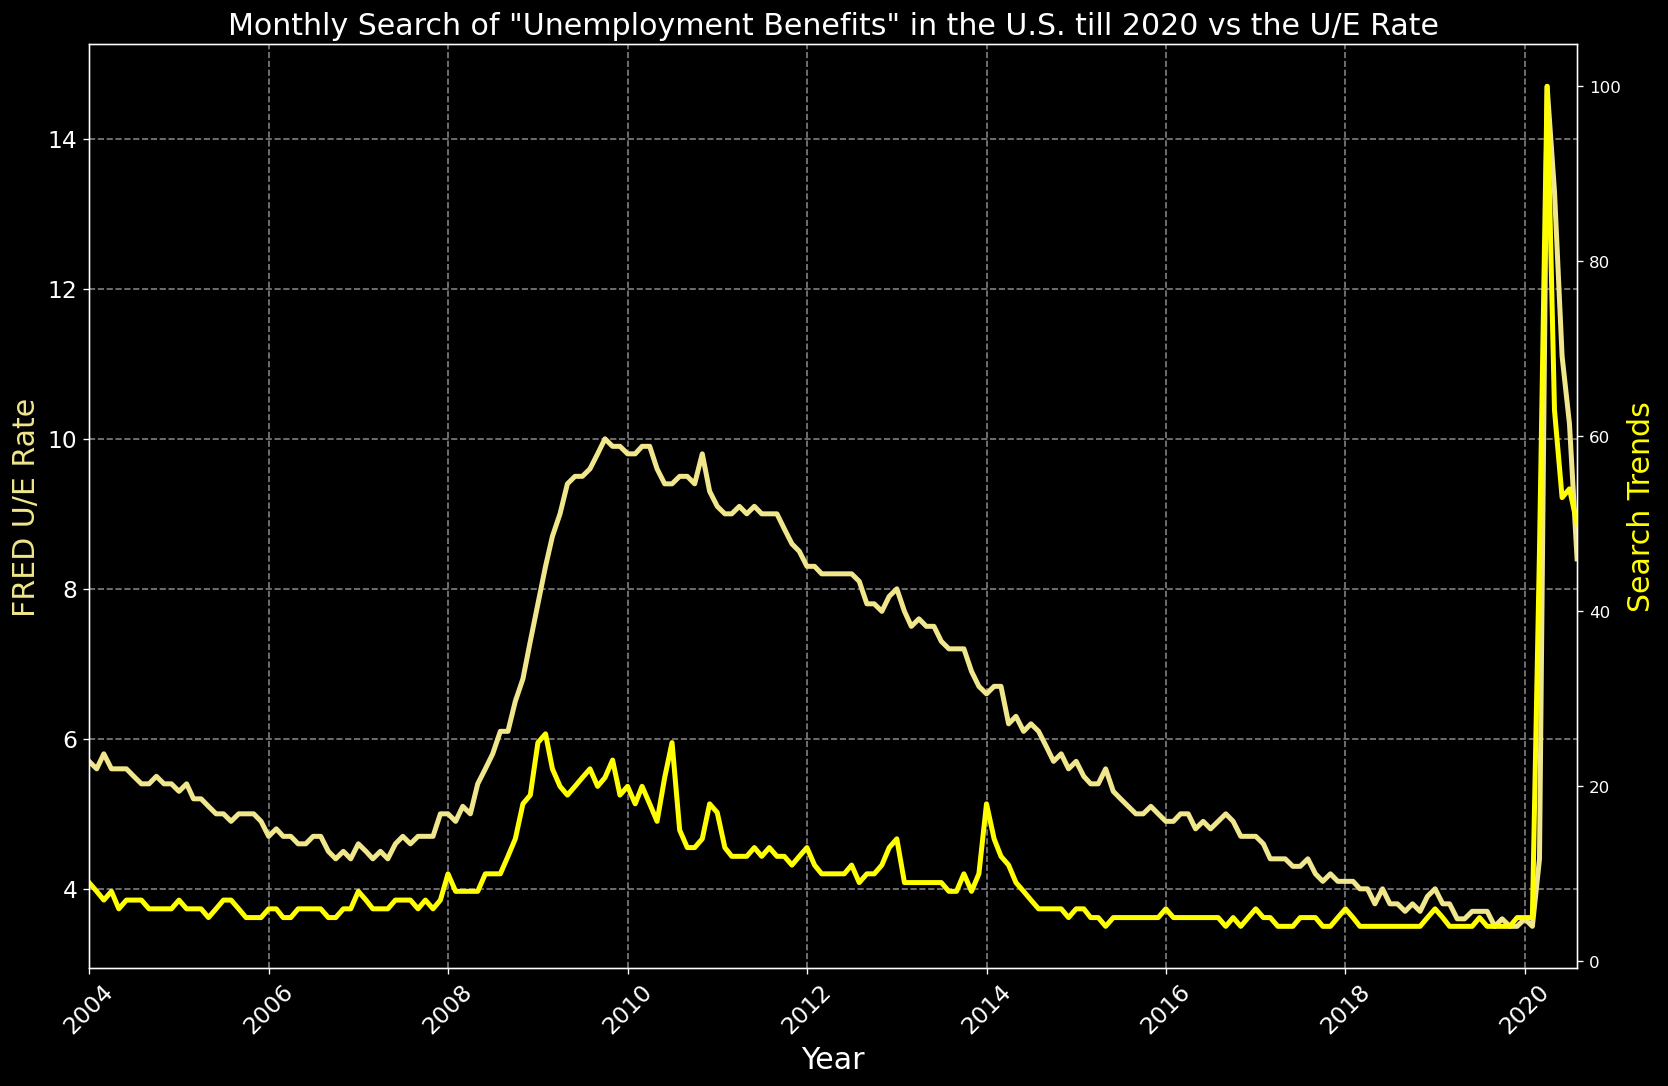

In [272]:
plt.figure(figsize=(16,10), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. till 2020 vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid(color="grey", linestyle="--", linewidth=1)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_unemployment_2020.MONTH.min(), df_unemployment_2020.MONTH.max())

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="khaki", fontsize=18)
ax2.set_ylabel("Search Trends", color="yellow", fontsize=18)

ax1.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UNRATE, color="khaki", linewidth=3)
ax2.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UE_BENEFITS_WEB_SEARCH, color="yellow", linewidth=3)
plt.show()